## Importing the necessary libraries 

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the data

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\survey_results_public.csv")

## Looking at the data

In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [5]:
df.shape

(65457, 114)

## Data cleaning
### Checking for duplicate data

In [6]:
# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 20


### Dropping duplicates

In [7]:
df.drop_duplicates()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Checking for missing data

In [8]:
# Total number of missing values per column
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data[missing_data > 0].head(20)  # Top 20 most missing columns

AINextMuch less integrated       64309
AINextLess integrated            63102
AINextNo change                  52955
AINextMuch more integrated       52018
EmbeddedAdmired                  48718
EmbeddedWantToWorkWith           47851
EmbeddedHaveWorkedWith           43236
ConvertedCompYearly              42020
AIToolNot interested in Using    41040
AINextMore integrated            41026
Knowledge_9                      37817
Frequency_3                      37742
Knowledge_8                      37694
ProfessionalTech                 37689
Knowledge_7                      37674
Knowledge_6                      37588
Knowledge_5                      37572
Knowledge_2                      37431
Knowledge_4                      37422
Knowledge_3                      37357
dtype: int64

### Checking data types

In [9]:
print(df.dtypes)

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


### Changing the data type of columns

## Data Exploration

In [10]:
# Select columns relevant to salary analysis by country
salary_df = df[['Country', 'ConvertedCompYearly', 'DevType', 'EdLevel', 'YearsCodePro']].copy()

# Clean up the data:
# 1. Remove rows without salary or country information
salary_df = salary_df.dropna(subset=['Country', 'ConvertedCompYearly'])

# 2. Convert salary to numeric (if not in the correct type)
salary_df['ConvertedCompYearly'] = pd.to_numeric(salary_df['ConvertedCompYearly'], errors='coerce')

# 3. Remove salary values ​​that are too high or too low (rough outlier)
salary_df = salary_df[(salary_df['ConvertedCompYearly'] > 1000) & (salary_df['ConvertedCompYearly'] < 500000)]

## 4. Calculate average salary by country (only take countries with at least 100 responses)
country_salary_stats = salary_df.groupby('Country').agg(
    avg_salary=('ConvertedCompYearly', 'mean'),
    count=('ConvertedCompYearly', 'count')
).reset_index()

# Filter countries with at least 100 responses
country_salary_stats = country_salary_stats[country_salary_stats['count'] >= 100]

# Sort by average salary descending, take top 10
top10_country_salary = country_salary_stats.sort_values(by='avg_salary', ascending=False).head(10)

top10_country_salary.reset_index(drop=True)

,Country,avg_salary,count
0,United States of America,151630.665428,4576
1,Switzerland,118862.290909,385
2,Israel,113735.046083,217
3,Australia,99905.306931,505
4,Ireland,97629.341667,120
5,United Kingdom of Great Britain and Northern I...,97139.275436,1376
6,Canada,96787.641860,860
7,Denmark,89713.123223,211
8,Norway,83503.379464,224
9,New Zealand,82054.242038,157


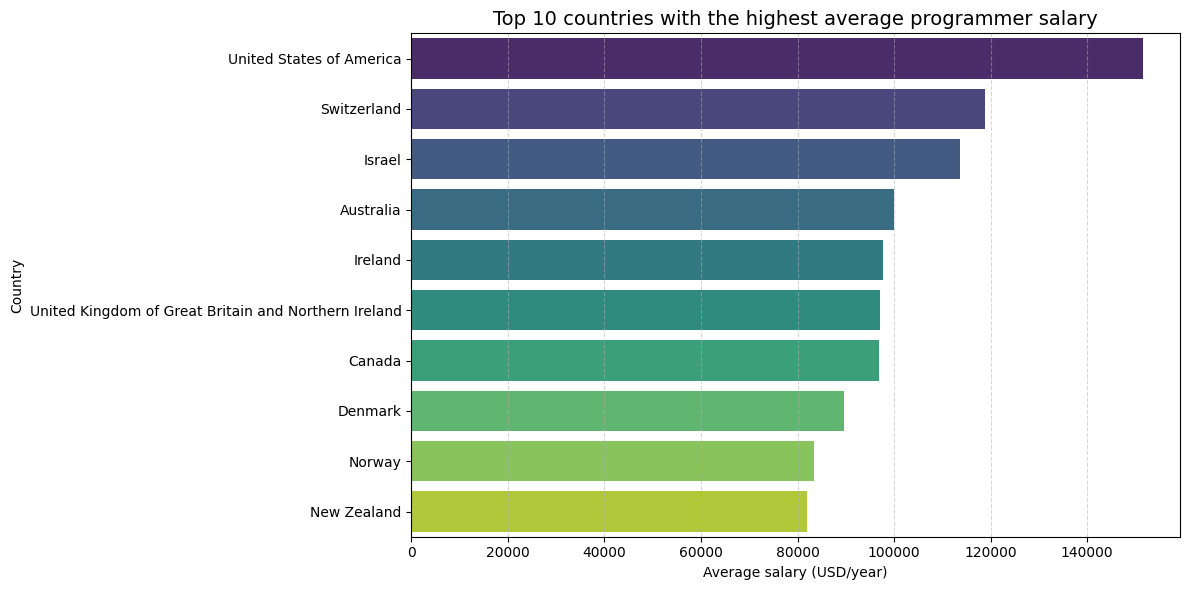

In [39]:
# Plot a bar chart: Average salary by country (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_country_salary, x='avg_salary', y='Country', hue='Country', palette='viridis', legend=False)
plt.title('Top 10 countries with the highest average programmer salary', fontsize=14)
plt.xlabel('Average salary (USD/year)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [40]:
# Remove missing DevType rows
devtype_salary = df[['DevType', 'ConvertedCompYearly']].dropna().copy()

# Split multiple job types into lists (separated by ;)
devtype_salary['DevType'] = devtype_salary['DevType'].str.split(';')

# "Explode" so each DevType is on a separate row
exploded_devtype = devtype_salary.explode('DevType')

# Calculate average salary by DevType and filter categories with at least 100 people
devtype_stats = exploded_devtype.groupby('DevType').agg(
    avg_salary=('ConvertedCompYearly', 'mean'),
    count=('ConvertedCompYearly', 'count')
).reset_index()

# Filter DevType with at least 100 people
devtype_stats = devtype_stats[devtype_stats['count'] >= 100]

# Get the top 10 DevTypes with the highest average salary
top10_devtype = devtype_stats.sort_values(by='avg_salary', ascending=False).head(10)

top10_devtype.reset_index(drop=True)

,DevType,avg_salary,count
0,"Senior Executive (C-Suite, VP, etc.)",231709.727273,297
1,Engineering manager,139882.767347,490
2,Cloud infrastructure engineer,122840.857143,259
3,"Engineer, site reliability",119763.613445,119
4,Other (please specify):,103544.620818,538
5,Data scientist or machine learning specialist,97926.416446,377
6,Data engineer,94149.305755,556
7,"Developer, AI",94075.794118,170
8,Research & Development role,93210.690840,262
9,DevOps specialist,85365.046620,429


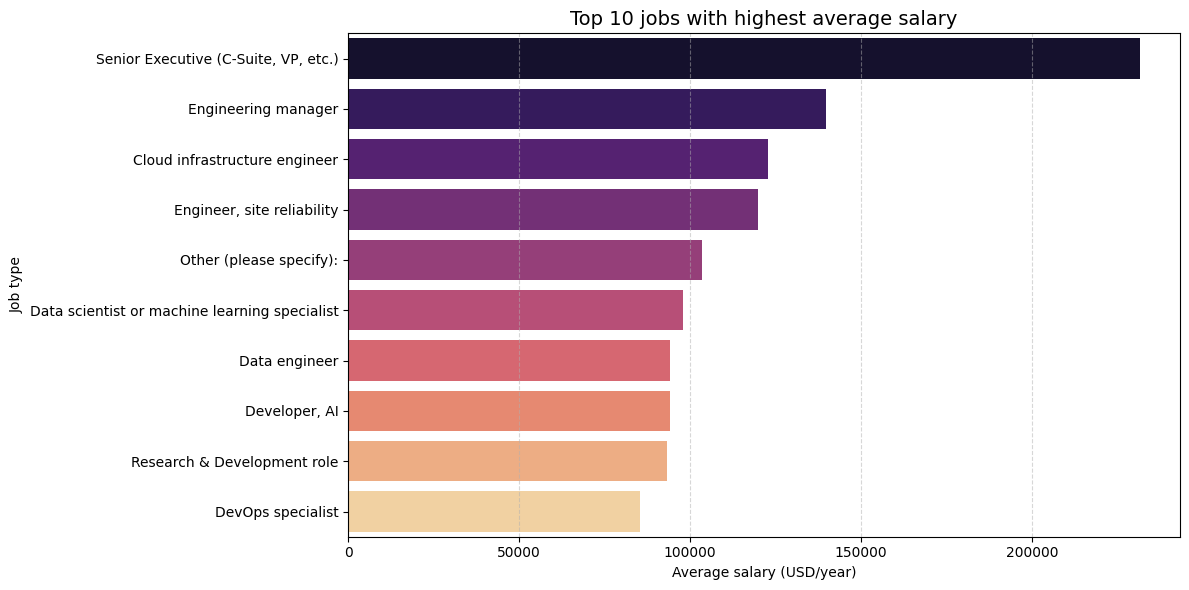

In [41]:
# Plot a bar chart: Average salary by DevType (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_devtype, x='avg_salary', y='DevType', hue='DevType', palette='magma', legend=False)
plt.title('Top 10 jobs with highest average salary', fontsize=14)
plt.xlabel('Average salary (USD/year)')
plt.ylabel('Job type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
# Drop rows without education level information
edu_salary = salary_df.dropna(subset=['EdLevel'])

# Get common degree groups (shorten names if necessary)
edu_salary['EdLevel'] = edu_salary['EdLevel'].replace({
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master",
    "Some college/university study without earning a degree": "Not yet graduated",
    "Associate degree (A.A., A.S., etc.)": "College",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Doctoral degree (Ph.D., Ed.D., etc.)": "PhD",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary school",
    "Something else": "Other"
})

# Calculate average salary by education level, filter groups with at least 100 people
edu_stats = edu_salary.groupby('EdLevel').agg(
    avg_salary=('ConvertedCompYearly', 'mean'),
    count=('ConvertedCompYearly', 'count')
).reset_index()

edu_stats = edu_stats[edu_stats['count'] >= 100].sort_values(by='avg_salary', ascending=False)

edu_stats.reset_index(drop=True)

,EdLevel,avg_salary,count
0,Professional,95096.432530,830
1,Master,82652.661917,5614
2,Bachelor,82406.224713,8967
3,Not yet graduated,76637.111928,2448
4,College,74011.099548,663
5,Primary/elementary school,68613.704348,115
6,Other,61006.483146,178
7,Secondary school,57131.400387,1034


In [43]:
# Drop rows without experience information
exp_salary = salary_df.dropna(subset=['YearsCodePro']).copy()

# Convert 'Less than 1 year' and 'More than 50 years' to numeric values
exp_salary['YearsCodePro'] = exp_salary['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
exp_salary['YearsCodePro'] = pd.to_numeric(exp_salary['YearsCodePro'], errors='coerce')

# Group by years of experience, calculate average salary
exp_stats = exp_salary.groupby('YearsCodePro').agg(
    avg_salary=('ConvertedCompYearly', 'mean'),
    count=('ConvertedCompYearly', 'count')
).reset_index()

# Keep only groups with at least 50 people
exp_stats = exp_stats[exp_stats['count'] >= 50]

exp_stats.head(10)

,YearsCodePro,avg_salary,count
0,0.5,33235.302658,489
1,1.0,35165.738462,780
2,2.0,42050.276024,1489
3,3.0,46704.383219,1597
4,4.0,56394.228070,1311
5,5.0,63372.727027,1480
6,6.0,72655.718175,1249
7,7.0,78871.119555,1079
8,8.0,83951.863551,1070
9,9.0,87932.436556,662


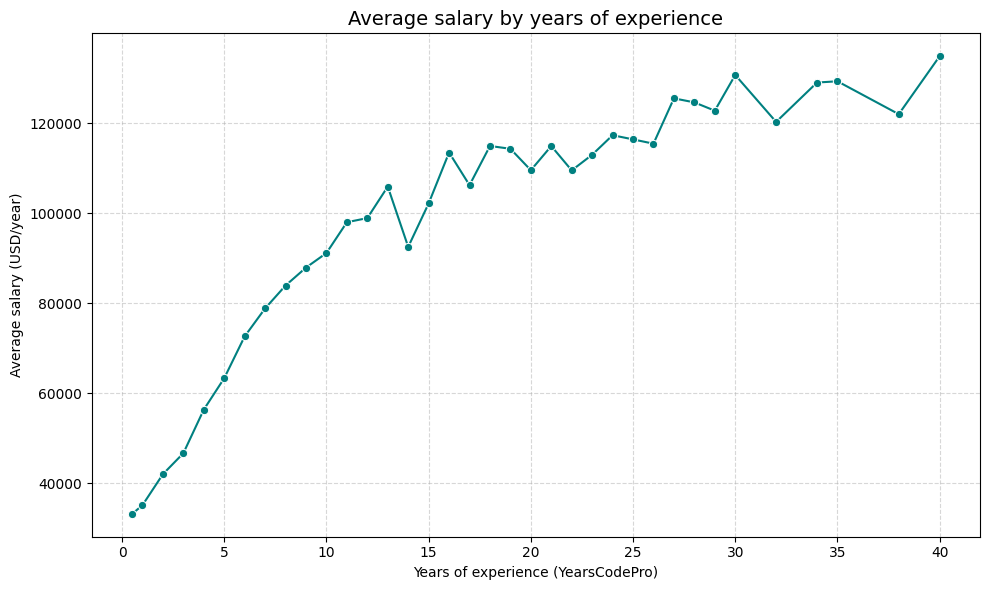

In [44]:
# Plot a line plot showing salary by years of experience
plt.figure(figsize=(10, 6))
sns.lineplot(data=exp_stats, x='YearsCodePro', y='avg_salary', marker='o', color='teal')
plt.title('Average salary by years of experience', fontsize=14)
plt.xlabel('Years of experience (YearsCodePro)')
plt.ylabel('Average salary (USD/year)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()